In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#import tensorflow as tf
#gpus = tf.config.list_physical_devices("GPU")

In [2]:
data=pd.read_csv('cicids2017.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length Mean       692703 non-nul

In [4]:
data[' Label'].unique()

array(['BENIGN', 'DDoS slowloris', 'DDoS Slowhttptest', 'DDoS Hulk',
       'DDoS GoldenEye', 'Heartbleed'], dtype=object)

In [5]:
data = data[data[' Label'] != 'Heartbleed']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692692 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692692 non-null  int64  
 1    Flow Duration                692692 non-null  int64  
 2    Total Fwd Packets            692692 non-null  int64  
 3    Total Backward Packets       692692 non-null  int64  
 4   Total Length of Fwd Packets   692692 non-null  int64  
 5    Total Length of Bwd Packets  692692 non-null  int64  
 6    Fwd Packet Length Max        692692 non-null  int64  
 7    Fwd Packet Length Min        692692 non-null  int64  
 8    Fwd Packet Length Mean       692692 non-null  float64
 9    Fwd Packet Length Std        692692 non-null  float64
 10  Bwd Packet Length Max         692692 non-null  int64  
 11   Bwd Packet Length Min        692692 non-null  int64  
 12   Bwd Packet Length Mean       692692 non-null  fl

In [7]:
data[' Label'].unique()

array(['BENIGN', 'DDoS slowloris', 'DDoS Slowhttptest', 'DDoS Hulk',
       'DDoS GoldenEye'], dtype=object)

In [8]:
data[' Label'].value_counts()

 Label
BENIGN               440031
DDoS Hulk            231073
DDoS GoldenEye        10293
DDoS slowloris         5796
DDoS Slowhttptest      5499
Name: count, dtype: int64

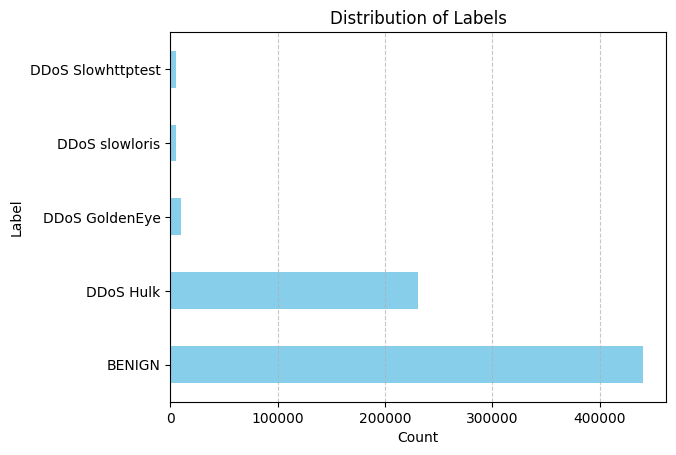

In [9]:
import matplotlib.pyplot as plt
labels = data.value_counts(' Label')
labels.plot(kind='barh', color='skyblue')
plt.xlabel('Count') 
plt.ylabel('Label')  
plt.title('Distribution of Labels')  
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.show()

In [10]:
import numpy as np

# Identify NaN and infinite values
nan_values = data['Flow Bytes/s'].isna().sum()
inf_values_flow_bytes = np.isinf(data['Flow Bytes/s']).sum()
inf_values_flow_packets = np.isinf(data[' Flow Packets/s']).sum()

# Calculate median and maximum values
median_flow_bytes = data['Flow Bytes/s'].median()
max_flow_bytes = data['Flow Bytes/s'][~np.isinf(data['Flow Bytes/s'])].max()
max_flow_packets = data[' Flow Packets/s'][~np.isinf(data[' Flow Packets/s'])].max()

# Replace NaN and infinite values
data['Flow Bytes/s'] = data['Flow Bytes/s'].fillna(median_flow_bytes)
data['Flow Bytes/s'] = data['Flow Bytes/s'].replace(np.inf, max_flow_bytes)
data[' Flow Packets/s'] = data[' Flow Packets/s'].replace(np.inf, max_flow_packets)


# Confirm the changes
updated_nan_values = data['Flow Bytes/s'].isna().sum()
updated_inf_values_flow_bytes = np.isinf(data['Flow Bytes/s']).sum()
updated_inf_values_flow_packets = np.isinf(data[' Flow Packets/s']).sum()

# Print summary
print(f"NaN values before: {nan_values}, after: {updated_nan_values}")
print(f"Infinite values (Flow Bytes/s) before: {inf_values_flow_bytes}, after: {updated_inf_values_flow_bytes}")
print(f"Infinite values (Flow Packets/s) before: {inf_values_flow_packets}, after: {updated_inf_values_flow_packets}")

NaN values before: 1008, after: 0
Infinite values (Flow Bytes/s) before: 289, after: 0
Infinite values (Flow Packets/s) before: 1297, after: 0


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
X = data.drop(columns=[' Label'])  # Assuming 'label' is the target variable
y = data[' Label']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [12]:
X

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,10,32,0.0,0.0,0,0,0.0,0.0,0,0
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
dt_classifier = DecisionTreeClassifier()

In [16]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
feature_importances = dt_classifier.feature_importances_

In [18]:
feature_importances

array([1.02782627e-01, 3.31037976e-04, 4.17870457e-04, 6.87088141e-05,
       1.76161765e-05, 2.91970842e-02, 4.50761002e-05, 2.43211740e-03,
       2.73854075e-04, 1.79463457e-04, 1.40579178e-03, 7.61935979e-06,
       4.94459131e-04, 4.97167538e-01, 2.94402767e-04, 5.29234967e-04,
       6.96493593e-02, 1.94851610e-03, 1.34544143e-03, 8.67789395e-03,
       1.05162786e-04, 6.23740160e-05, 6.44130408e-05, 2.60293729e-04,
       4.86455386e-03, 0.00000000e+00, 3.17081097e-04, 5.92974202e-03,
       6.15363491e-06, 1.71926470e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.35570084e-03, 2.10516172e-05,
       3.66569327e-04, 1.84300496e-02, 9.91426835e-05, 1.95524252e-03,
       2.01151728e-01, 7.21971627e-04, 0.00000000e+00, 2.10668489e-03,
       0.00000000e+00, 0.00000000e+00, 6.36313580e-05, 7.40749614e-06,
       2.37613046e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.79314064e-05, 1.88045175e-05, 3.47103970e-04, 5.89372200e-03,
      

In [19]:
mean_importance = feature_importances.mean()

In [20]:
mean_importance

0.012820512820512824

In [21]:
selected_features=[]
for i in range(len(feature_importances)):
    if(feature_importances[i]>mean_importance):
        selected_features.append(i)
selected_features

[0, 5, 13, 16, 37, 40]

In [22]:
lst=[]
for i in selected_features:
    lst.append(data.columns[i])
lst

[' Destination Port',
 ' Total Length of Bwd Packets',
 ' Bwd Packet Length Std',
 ' Flow IAT Mean',
 ' Bwd Packets/s',
 ' Packet Length Mean']

In [23]:
# indices to keep
indices_to_keep = [0, 13, 16, 37, 40, 65,78]

# Select columns based on indices to keep
selected_columns = data.columns[indices_to_keep]

# Create a new dataframe with only selected columns
new_df = data[selected_columns]

# Save the new dataframe
new_df

,Destination Port,Bwd Packet Length Std,Flow IAT Mean,Bwd Packets/s,Packet Length Mean,Subflow Bwd Bytes,Label
0,80,0.000000,38308.000000,26.104208,6.000000,6,BENIGN
1,389,89.278777,31.933333,10438.413360,29.294118,326,BENIGN
2,88,813.326503,73.000000,5479.452055,370.588235,3150,BENIGN
3,389,977.480342,543.071429,789.162173,337.066667,6660,BENIGN
4,88,813.842901,78.000000,5494.505495,393.875000,3152,BENIGN
...,...,...,...,...,...,...,...
692698,53,0.000000,6443.000000,62.082881,41.714286,152,BENIGN
692699,53,0.000000,108.000000,6172.839506,97.600000,362,BENIGN
692700,58030,0.000000,41.000000,12195.121950,17.000000,6,BENIGN
692701,53,0.000000,149805.000000,1.907241,53.333333,256,BENIGN


In [24]:
new_df

,Destination Port,Bwd Packet Length Std,Flow IAT Mean,Bwd Packets/s,Packet Length Mean,Subflow Bwd Bytes,Label
0,80,0.000000,38308.000000,26.104208,6.000000,6,BENIGN
1,389,89.278777,31.933333,10438.413360,29.294118,326,BENIGN
2,88,813.326503,73.000000,5479.452055,370.588235,3150,BENIGN
3,389,977.480342,543.071429,789.162173,337.066667,6660,BENIGN
4,88,813.842901,78.000000,5494.505495,393.875000,3152,BENIGN
...,...,...,...,...,...,...,...
692698,53,0.000000,6443.000000,62.082881,41.714286,152,BENIGN
692699,53,0.000000,108.000000,6172.839506,97.600000,362,BENIGN
692700,58030,0.000000,41.000000,12195.121950,17.000000,6,BENIGN
692701,53,0.000000,149805.000000,1.907241,53.333333,256,BENIGN


In [25]:
import pandas as pd
#import h2o4gpu as sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [26]:
X = new_df.drop(columns=[' Label'])
y = new_df[' Label']

In [27]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.35650577, -0.59980987, -0.44041297, -0.13022541, -0.73754971,
        -0.00753027],
       [-0.33685868, -0.51850165, -0.44725289,  0.20653007, -0.6744381 ,
        -0.00738746],
       [-0.3559971 ,  0.14090513, -0.44724555,  0.04614707,  0.25024258,
        -0.00612718],
       ...,
       [ 3.32811763, -0.59980987, -0.44725127,  0.26334564, -0.707747  ,
        -0.00753027],
       [-0.3582225 , -0.59980987, -0.42048847, -0.13100799, -0.60930777,
        -0.0074187 ],
       [-0.3582225 , -0.59980987, -0.44386548, -0.13038835, -0.57537655,
        -0.00743209]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define MLP classifier
mlp = MLPClassifier()

In [31]:
parameter_space = {
    'hidden_layer_sizes': [50,100,200],
    'activation': ['relu','tanh', 'sigmoid'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

In [ ]:
# Perform grid search with adam solver
grid_adam = GridSearchCV(mlp, parameter_space,cv=2, verbose=10,n_jobs=-1)
grid_adam.fit(X_train, y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


In [ ]:
print("Best parameters found: ", grid_adam.best_params_)
print("Best score: ", grid_adam.best_score_)


In [ ]:
adam_model = grid_adam.best_estimator_

In [ ]:
y_pred_adam = adam_model.predict(X_test)
accuracy_adam = accuracy_score(y_test, y_pred_adam)
precision_adam = precision_score(y_test, y_pred_adam, average='macro')
recall_adam = recall_score(y_test, y_pred_adam, average='macro')
f1_adam = f1_score(y_test, y_pred_adam, average='macro')

print("ADAM Test Accuracy  : ", accuracy_adam*100)
print("ADAM Test Precision : ", precision_adam*100)
print("ADAM Test Recall    : ", recall_adam*100)
print("ADAM Test F1 Score  : ", f1_adam*100)

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
import joblib
joblib.dump(mlp,'final_out.joblib')

In [ ]:
parameter_grid = {
    'hidden_layer_sizes': [(50,),(100,)],
    'activation': ['relu'],
    'solver': ['lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

In [ ]:
# Perform grid search with Limited-Memory BFGS solver
grid_lbfgs = GridSearchCV(mlp, parameter_grid,cv=2, verbose=10,n_jobs=-1)
grid_lbfgs.fit(X_train, y_train)

In [ ]:
print("Best parameters found: ", grid_lbfgs.best_params_)
print("Best score: ", grid_lbfgs.best_score_)

In [ ]:
lbfgs_model = grid_lbfgs.best_estimator_

In [ ]:
y_pred_lbfgs = lbfgs_model.predict(X_test)
accuracy_lbfgs = accuracy_score(y_test, y_pred_lbfgs)
precision_lbfgs = precision_score(y_test, y_pred_lbfgs, average='macro')
recall_lbfgs = recall_score(y_test, y_pred_lbfgs, average='macro')
f1_lbfgs= f1_score(y_test, y_pred_lbfgs, average='macro')

print("LBFGS Test Accuracy  : ", accuracy_lbfgs*100)
print("LBFGS Test Precision : ", precision_lbfgs*100)
print("LBFGS Test Recall    : ", recall_lbfgs*100)
print("LBFGS Test F1 Score  : ", f1_lbfgs*100)

In [ ]:
parameter_box = {
    'hidden_layer_sizes': [(50),(100)],
    'activation': ['relu','tanh','sigmoid'],
    'solver': ['sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

In [ ]:
# Perform grid search with Stochastic Gradient Descent solver
grid_sgd = GridSearchCV(mlp, parameter_box,cv=2, verbose=10,n_jobs=-1)
grid_sgd.fit(X_train, y_train)

In [ ]:
print("Best parameters found: ", grid_sgd.best_params_)
print("Best score: ", grid_sgd.best_score_)

In [ ]:
sgd_model = grid_sgd.best_estimator_

In [ ]:
y_pred_sgd = sgd_model.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd, average='macro')
recall_sgd = recall_score(y_test, y_pred_sgd, average='macro')
f1_sgd= f1_score(y_test, y_pred_sgd, average='macro')

print("SGD Test Accuracy  : ", accuracy_sgd*100)
print("SGD Test Precision : ", precision_sgd*100)
print("SGD Test Recall    : ", recall_sgd*100)
print("SGD Test F1 Score  : ", f1_sgd*100)

In [ ]:
solvers = ['Adam','lbfgs','sgd']
acc_total = [accuracy_adam, accuracy_lbfgs, accuracy_sgd]  
prec_total = [precision_adam, precision_lbfgs, precision_sgd] 
recall_total=[recall_adam, recall_lbfgs, recall_sgd]
f1_total = [f1_adam, f1_lbfgs, f1_sgd]  
colors=['skyblue','salmon','lightgreen']

In [ ]:
import matplotlib.pyplot as plt
# Plotting the comparison of accuracy
plt.figure(figsize=(5, 5))
plt.bar(solvers, acc_total, color=colors,width=0.5)
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy between Solvers')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylim(0, 1)  # set the y-axis limit to 0-1 for accuracy

plt.show()


In [ ]:
# Plotting the comparison of precision
plt.figure(figsize=(5, 5))
plt.bar(solvers, prec_total, color=colors,width=0.4)
plt.xlabel('Solver')
plt.ylabel('Precision')
plt.title('Comparison of Precision between Solvers')
plt.ylim(0, 1)  # set the y-axis limit to 0-1 for precision
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

In [ ]:
# Plotting the comparison of recall
plt.figure(figsize=(5, 5))
plt.bar(solvers, recall_total, color=colors,width=0.4)
plt.xlabel('Solver')
plt.ylabel('Recall')
plt.title('Comparison of Recall Scores between Solvers')
plt.ylim(0, 1)  # set the y-axis limit to 0-1 for precision
plt.yticks([i/10 for i in range(11)])
plt.show()


In [ ]:
# Plotting the comparison of F1 score
plt.figure(figsize=(5, 5))
plt.bar(solvers,f1_total, color=colors,width=0.4)
plt.xlabel('Solver')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Score between Solvers')
plt.ylim(0, 1)  # set the y-axis limit to 0-1 for F1 score
plt.yticks([i/10 for i in range(11)])
plt.show()
